In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-67.74810385613355, 151.28951747939834),
 (-52.60117007843615, 82.34623800696568),
 (-53.07299524953103, 70.32776832681543),
 (-55.64073919288762, 70.27596684467221),
 (85.71754247409658, 130.80403230506033),
 (46.97937711103401, 50.8404585031943),
 (84.453138084682, 176.23361061978324),
 (82.34720971493391, -130.6300077557821),
 (-22.366517989141016, -81.77656557033049),
 (81.45154946881868, 72.97928446507473),
 (21.550665875627004, 114.26139717231871),
 (74.12094222685732, -45.22251190420661),
 (-62.09164499094862, -38.39586833826078),
 (-6.056208547099516, 152.79896268170455),
 (-74.03126980259569, -94.61722339824222),
 (-81.86707352492805, 3.3866853732285733),
 (46.322388359919046, -22.34279744022527),
 (-74.73863987047005, -104.8974907893372),
 (57.31746357242329, 165.786614327508),
 (76.86991070083513, 11.011498811044873),
 (85.49776276073644, -14.882178050197638),
 (-57.345473964517055, 168.05881457941462),
 (72.32888124056714, -48.32904713982995),
 (40.91681159827007, 100.657

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-67.74810385613355 151.28951747939834
-52.60117007843615 82.34623800696568
-53.07299524953103 70.32776832681543
-55.64073919288762 70.27596684467221
85.71754247409658 130.80403230506033
46.97937711103401 50.8404585031943
84.453138084682 176.23361061978324
82.34720971493391 -130.6300077557821
-22.366517989141016 -81.77656557033049
81.45154946881868 72.97928446507473
21.550665875627004 114.26139717231871
74.12094222685732 -45.22251190420661
-62.09164499094862 -38.39586833826078
-6.056208547099516 152.79896268170455
-74.03126980259569 -94.61722339824222
-81.86707352492805 3.3866853732285733
46.322388359919046 -22.34279744022527
-74.73863987047005 -104.8974907893372
57.31746357242329 165.786614327508
76.86991070083513 11.011498811044873
85.49776276073644 -14.882178050197638
-57.345473964517055 168.05881457941462
72.32888124056714 -48.32904713982995
40.91681159827007 100.65777989634228
-9.163549934269682 155.87992562766664
-17.460564520066967 42.62165000278239
-20.815690664954815 -50.137502

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | balykshi
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | marcona
City not found. Skipping...
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | shenzhen
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kokopo
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | zhangye
Processing Record 22 of Set 1 | gizo
P

Processing Record 41 of Set 4 | tynda
Processing Record 42 of Set 4 | namatanai
Processing Record 43 of Set 4 | port hardy
Processing Record 44 of Set 4 | camacha
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | muros
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | newport
Processing Record 50 of Set 4 | mindelo
Processing Record 1 of Set 5 | phalaborwa
Processing Record 2 of Set 5 | dillingen
Processing Record 3 of Set 5 | lodwar
Processing Record 4 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 5 of Set 5 | obo
Processing Record 6 of Set 5 | shirvan
Processing Record 7 of Set 5 | atasu
Processing Record 8 of Set 5 | salsomaggiore terme
Processing Record 9 of Set 5 | north bend
Processing Record 10 of Set 5 | lebanon
Processing Record 11 of Set 5 | qostanay
Processing Record 12 of Set 5 | evensk
Processing Record 13 of Set 5 | victoria
Processing Record 14 of Set 5 | 

Processing Record 28 of Set 8 | porto de moz
Processing Record 29 of Set 8 | westport
Processing Record 30 of Set 8 | cap malheureux
Processing Record 31 of Set 8 | yalta
Processing Record 32 of Set 8 | barguzin
Processing Record 33 of Set 8 | soe
Processing Record 34 of Set 8 | san juan
Processing Record 35 of Set 8 | vila
Processing Record 36 of Set 8 | gurlan
Processing Record 37 of Set 8 | mirador
Processing Record 38 of Set 8 | belaya gora
Processing Record 39 of Set 8 | halifax
Processing Record 40 of Set 8 | igarka
Processing Record 41 of Set 8 | sao jose da coroa grande
Processing Record 42 of Set 8 | ahipara
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | saint-francois
Processing Record 45 of Set 8 | keita
Processing Record 46 of Set 8 | carutapera
Processing Record 47 of Set 8 | kasongo-lunda
Processing Record 48 of Set 8 | sao joao do piaui
Processing Record 49 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 50 of Set 8 | zh

Processing Record 17 of Set 12 | saint-michel-des-saints
Processing Record 18 of Set 12 | lolua
City not found. Skipping...
Processing Record 19 of Set 12 | sao goncalo do amarante
Processing Record 20 of Set 12 | havoysund
Processing Record 21 of Set 12 | haines junction
Processing Record 22 of Set 12 | balikpapan
Processing Record 23 of Set 12 | port macquarie
Processing Record 24 of Set 12 | karratha
Processing Record 25 of Set 12 | prabumulih
Processing Record 26 of Set 12 | gold coast
Processing Record 27 of Set 12 | shimoda
Processing Record 28 of Set 12 | kushiro
Processing Record 29 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 30 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 31 of Set 12 | chippewa falls
Processing Record 32 of Set 12 | gigmoto
Processing Record 33 of Set 12 | homer
Processing Record 34 of Set 12 | shamsabad
Processing Record 35 of Set 12 | porto novo
Processing Record 36 of Set 12 | brunsbuttel
Processing Record 3

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,81.05,46,0,14.97,AU,2022-11-10 02:04:58
1,Busselton,-33.6500,115.3333,63.86,74,99,14.36,AU,2022-11-10 02:06:56
2,Saint-Philippe,-21.3585,55.7679,69.39,74,62,6.29,RE,2022-11-10 02:06:56
3,Tiksi,71.6872,128.8694,-10.84,97,99,8.57,RU,2022-11-10 02:06:57
4,Balykshi,47.0667,51.8667,32.00,86,75,6.71,KZ,2022-11-10 02:06:57
5,Leningradskiy,69.3833,178.4167,0.12,87,100,4.76,RU,2022-11-10 02:06:57
6,Tuktoyaktuk,69.4541,-133.0374,16.95,93,94,11.92,CA,2022-11-10 02:06:58
7,Dikson,73.5069,80.5464,-4.38,100,19,9.22,RU,2022-11-10 02:06:58
8,Shenzhen,22.5455,114.0683,79.93,83,2,1.99,CN,2022-11-10 02:02:49
9,Ilulissat,69.2167,-51.1000,6.82,61,75,8.05,GL,2022-11-10 02:06:58


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-11-10 02:04:58,-42.8794,147.3294,81.05,46,0,14.97
1,Busselton,AU,2022-11-10 02:06:56,-33.6500,115.3333,63.86,74,99,14.36
2,Saint-Philippe,RE,2022-11-10 02:06:56,-21.3585,55.7679,69.39,74,62,6.29
3,Tiksi,RU,2022-11-10 02:06:57,71.6872,128.8694,-10.84,97,99,8.57
4,Balykshi,KZ,2022-11-10 02:06:57,47.0667,51.8667,32.00,86,75,6.71


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

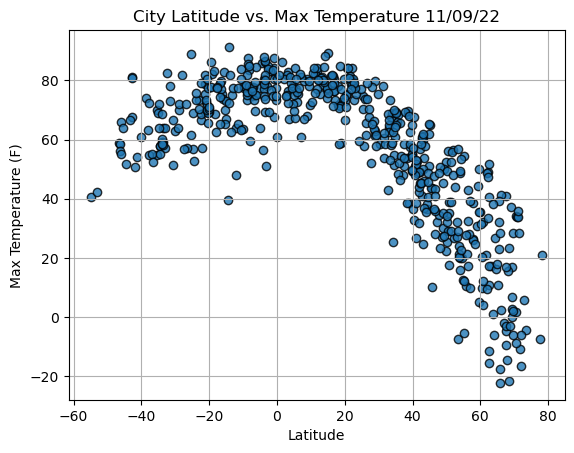

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

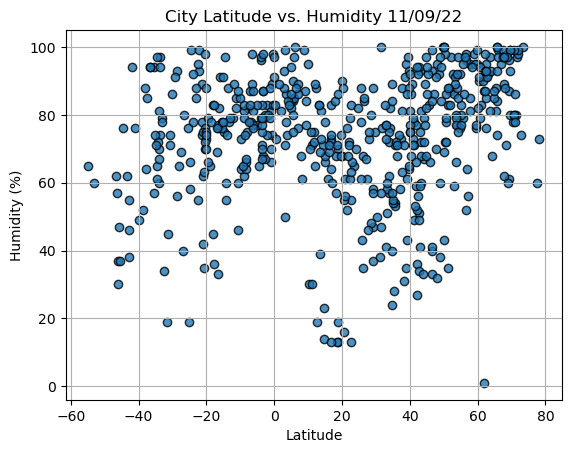

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

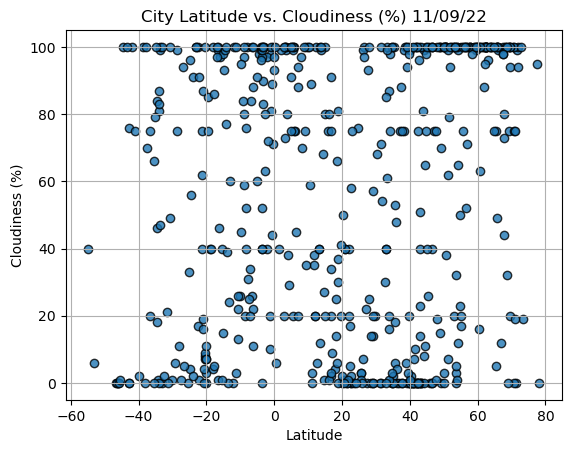

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

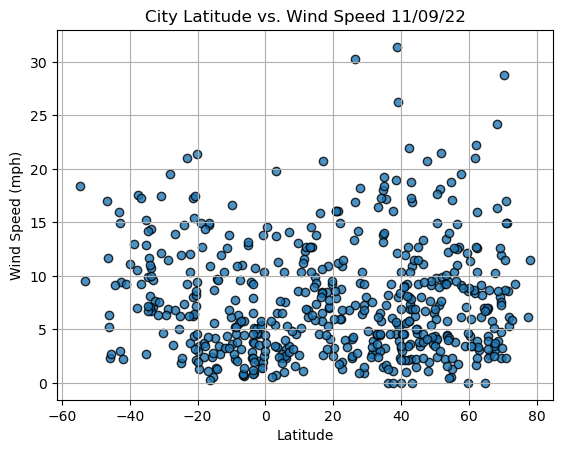

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()


In [94]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [95]:
# Import Matplotlib.
import matplotlib.pyplot as plt

In [96]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

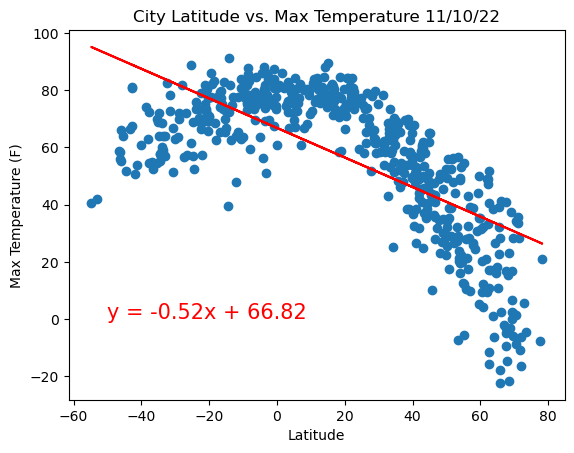

In [97]:
x_values = lats
y_values = max_temps
title=f"City Latitude vs. Max Temperature "+ time.strftime("%x")
y_label="Max Temperature (F)"
text_coordinates=(-50,0)
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

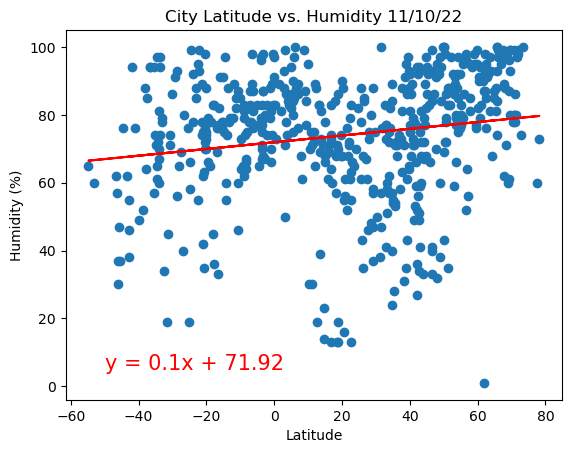

In [98]:
x_values = lats
y_values = humidity
title=f"City Latitude vs. Humidity "+ time.strftime("%x")
y_label="Humidity (%)"
text_coordinates=(-50,5)
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

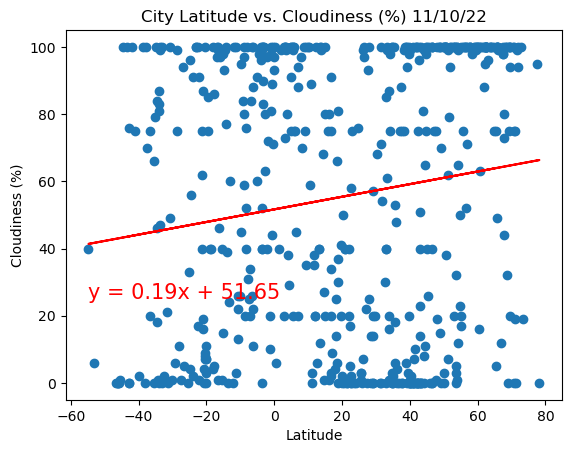

In [102]:
x_values = lats
y_values = cloudiness
title=f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x")
y_label="Cloudiness (%)"
text_coordinates=(-55,25)
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

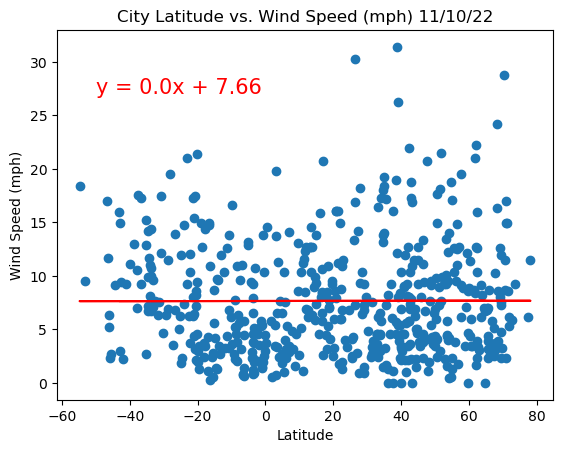

In [105]:
x_values = lats
y_values = wind_speed
title=f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x")
y_label="Wind Speed (mph)"
text_coordinates=(-50,27)
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

In [107]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Tiksi,RU,2022-11-10 02:06:57,71.6872,128.8694,-10.84,97,99,8.57
4,Balykshi,KZ,2022-11-10 02:06:57,47.0667,51.8667,32.00,86,75,6.71
5,Leningradskiy,RU,2022-11-10 02:06:57,69.3833,178.4167,0.12,87,100,4.76
6,Tuktoyaktuk,CA,2022-11-10 02:06:58,69.4541,-133.0374,16.95,93,94,11.92
7,Dikson,RU,2022-11-10 02:06:58,73.5069,80.5464,-4.38,100,19,9.22


In [108]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

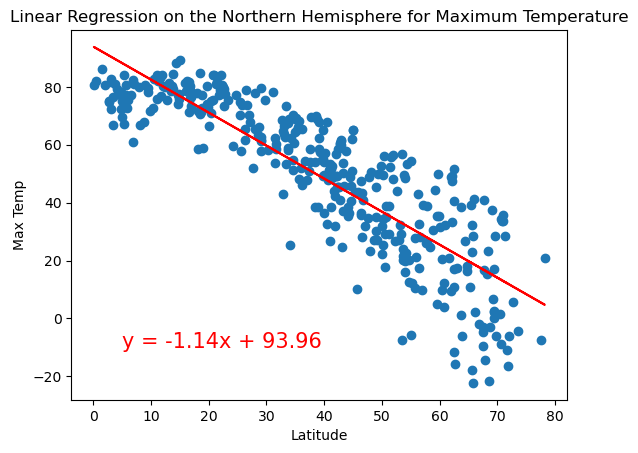

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,-10))

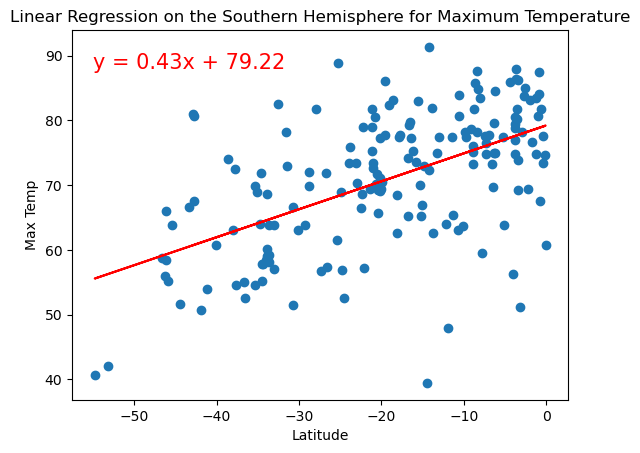

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,88))

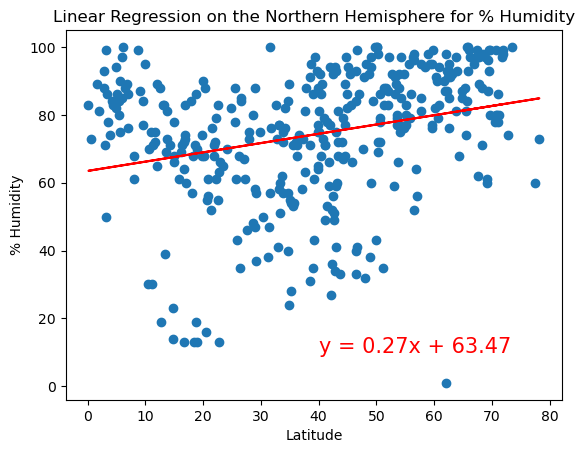

In [121]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

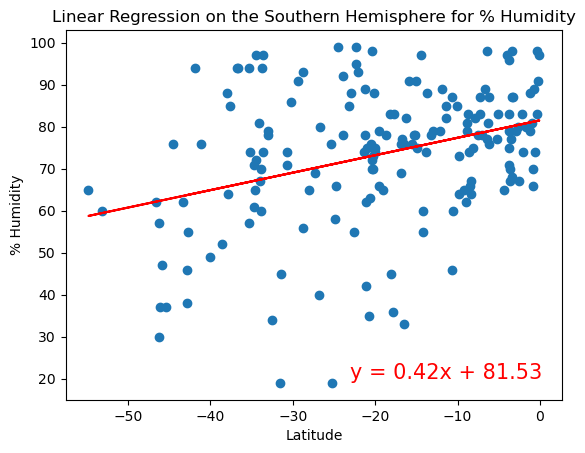

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-23,20))

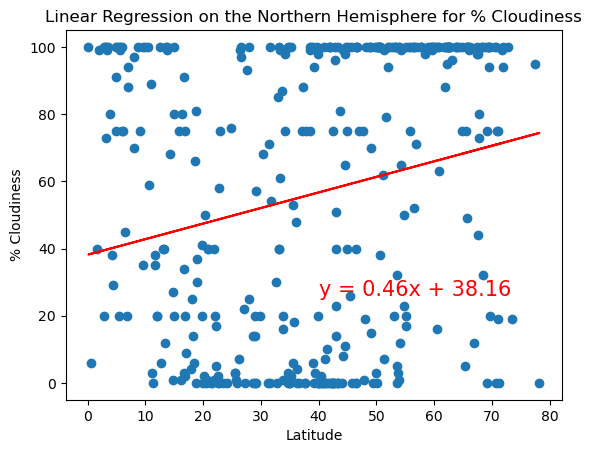

In [130]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,26))

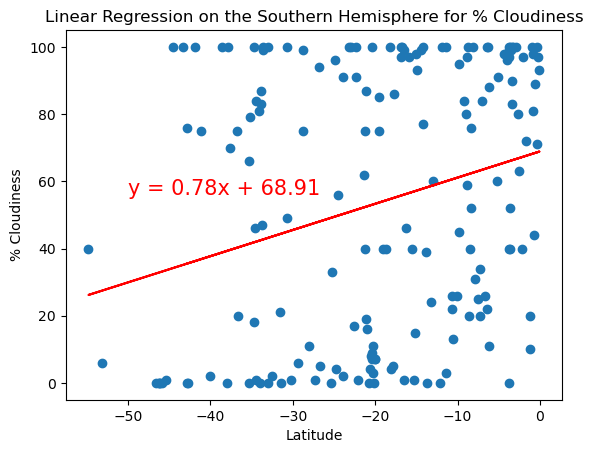

In [133]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,56))

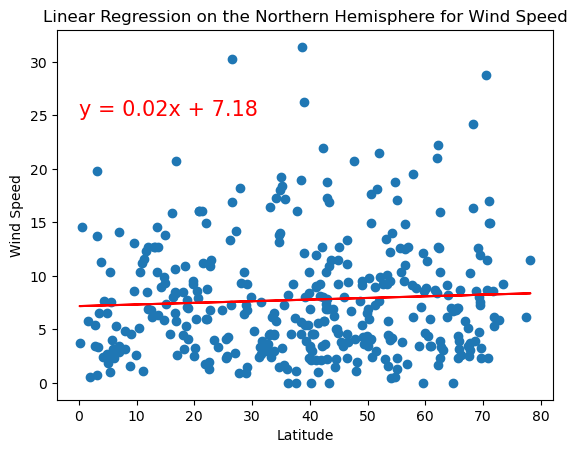

In [135]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,25))

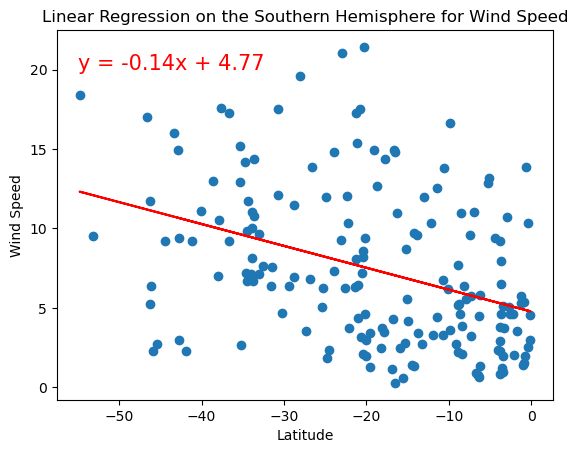

In [138]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-55,20))